# Data Analysis Over Multiple JSON Data Files from the Unity Experiment Application

Given several JSON files containing experiment data, apply a variety of analytical techniques to summarise and interpret the data

## Imports and Setup

In [1]:
import Rotor
import json
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

## Compile JSON Data into single Dictionaries

In [2]:
# List of data files
data_files = [
    "1-29-01-2022-13-30.json",
    "2-30-01-2022-13-00.json",
    "3-30-01-2022-19-00.json",
    "4-31-01-2022-16-00.json",
    "5-05-02-2022-17-00.json",
    "6-12-02-2022-22-00.json",
    "7-16-02-2022-16-00.json"
]

RESULT_MULTIPLIER = len(data_files) # Determine how many times a test has occurred per representation

directory_prefix = "data/" # "../raw"

# Temp test dictionary to be copied
temp = {
    "Shape Match":{
        "Loaded Shape":[],
        "Selected Shape":[],
        "Time Taken":[],
        "Time Remaining":[],
        "W Count":[],
        "Swipe Count":[],
        "Initial Rotor":[],
        "Final Rotor":[],
        "Confidence":[],
        "Understanding":[],
    },
    "Rotation Match":{
        "Loaded Shape":[],
        "Texture":[],
        "Time Taken":[],
        "Time Remaining":[],
        "Loaded Rotation":[],
        "Selected Rotation":[],
        "Confidence":[],
        "Understanding":[],
    },
    "Pose Match":{
        "Loaded Shape":[],
        "Texture":[],
        "Time Taken":[],
        "Time Remaining":[],
        "W Count":[],
        "Swipe Count":[],
        "Main Rotor":[],
        "Match Rotor":[],
        "Initial Match Rotor":[],
        "Ease":[],
    }
}

# Unordered dictionary grouped by representation
compiled_data = {
    "Control": copy.deepcopy(temp),
    "Timeline": copy.deepcopy(temp),
    "4D-3D": copy.deepcopy(temp),
    "Multi-View": copy.deepcopy(temp),
}

# Ordered dictionary grouped by user use over time
ordered_data = {
    0: copy.deepcopy(temp),
    1: copy.deepcopy(temp),
    2: copy.deepcopy(temp),
    3: copy.deepcopy(temp),
}
ordered_data[0]["Representations"] = []
ordered_data[1]["Representations"] = []
ordered_data[2]["Representations"] = []
ordered_data[3]["Representations"] = []

# Iterate through listed files and add them to 
# the compiled data and order based data
for file in data_files:
    # Get file name
    filename = directory_prefix+file
    print("Reading \"" + filename + "\"")

    # Try open file
    # Skip on fail
    try:
        with open(filename, "r") as f:
            data = json.load(f)
    except Exception as e:
        print(e)
        continue


    o = -1

    # Iterate through the files data
    # Copy the data to the single data structure
    for rep, tests in data.items():

        # iterate through the number of tests for shape match and pose match
        for i in range(5):

            # Copy Shape Match Data
            compiled_data[rep]["Shape Match"]["Loaded Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"] )
            compiled_data[rep]["Shape Match"]["Selected Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] )

            compiled_data[rep]["Shape Match"]["Time Taken"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Shape Match"]["Time Remaining"].append( 20 - tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )

            compiled_data[rep]["Shape Match"]["W Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"] )
            compiled_data[rep]["Shape Match"]["Swipe Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"] )

            compiled_data[rep]["Shape Match"]["Initial Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Initial Rotation"] )
            compiled_data[rep]["Shape Match"]["Final Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Final Rotation"] )

            compiled_data[rep]["Shape Match"]["Confidence"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"] )
            compiled_data[rep]["Shape Match"]["Understanding"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] )

            # Copy Rotation Match Data
            compiled_data[rep]["Rotation Match"]["Loaded Shape"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"] )
            compiled_data[rep]["Rotation Match"]["Texture"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Texture"] )

            compiled_data[rep]["Rotation Match"]["Time Taken"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Rotation Match"]["Time Remaining"].append( 60 - tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )

            compiled_data[rep]["Rotation Match"]["Loaded Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"] )
            compiled_data[rep]["Rotation Match"]["Selected Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"] )
            
            compiled_data[rep]["Rotation Match"]["Confidence"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"] )
            compiled_data[rep]["Rotation Match"]["Understanding"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] )
        
        # iterate through the number of tests for pose matching
        for i in range(3):
            
            # Copy Pose Match Data
            compiled_data[rep]["Pose Match"]["Loaded Shape"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Shape"] )
            compiled_data[rep]["Pose Match"]["Texture"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Texture"] )
            
            compiled_data[rep]["Pose Match"]["Time Taken"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Pose Match"]["Time Remaining"].append( 180 - tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            
            compiled_data[rep]["Pose Match"]["W Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["W Count"] )
            compiled_data[rep]["Pose Match"]["Swipe Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Swipe Count"] )
            
            compiled_data[rep]["Pose Match"]["Main Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"] )
            compiled_data[rep]["Pose Match"]["Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"] )
            compiled_data[rep]["Pose Match"]["Initial Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Initial Match Rotor"] )

            compiled_data[rep]["Pose Match"]["Ease"].append( tests["Pose_Match"]["Pose_Match{0}_Survey".format(i)]["confidance"] )
    
    # Iterate through the files data
    # Copy the data to the single order based data structure

        # List the representations to match file order
        o += 1
        ordered_data[o]["Representations"].append(rep)

        # iterate through the number of tests for shape match and pose match
        for i in range(5):
            
            # Copy Shape Match Data
            ordered_data[o]["Shape Match"]["Loaded Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"] )
            ordered_data[o]["Shape Match"]["Selected Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] )

            ordered_data[o]["Shape Match"]["Time Taken"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Shape Match"]["Time Remaining"].append( 20 - tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )

            ordered_data[o]["Shape Match"]["W Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"] )
            ordered_data[o]["Shape Match"]["Swipe Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"] )

            ordered_data[o]["Shape Match"]["Initial Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Initial Rotation"] )
            ordered_data[o]["Shape Match"]["Final Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Final Rotation"] )

            ordered_data[o]["Shape Match"]["Confidence"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"] )
            ordered_data[o]["Shape Match"]["Understanding"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] )

            # Copy Rotation Match Data
            ordered_data[o]["Rotation Match"]["Loaded Shape"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"] )
            ordered_data[o]["Rotation Match"]["Texture"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Texture"] )

            ordered_data[o]["Rotation Match"]["Time Taken"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Rotation Match"]["Time Remaining"].append( 60 - tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )

            ordered_data[o]["Rotation Match"]["Loaded Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"] )
            ordered_data[o]["Rotation Match"]["Selected Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"] )
            
            ordered_data[o]["Rotation Match"]["Confidence"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"] )
            ordered_data[o]["Rotation Match"]["Understanding"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] )
        
        # iterate through the number of tests for pose matching
        for i in range(3):
            
            # Copy Pose Match Data
            ordered_data[o]["Pose Match"]["Loaded Shape"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Shape"] )
            ordered_data[o]["Pose Match"]["Texture"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Texture"] )
            
            ordered_data[o]["Pose Match"]["Time Taken"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Pose Match"]["Time Remaining"].append( 180 - tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            
            ordered_data[o]["Pose Match"]["W Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["W Count"] )
            ordered_data[o]["Pose Match"]["Swipe Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Swipe Count"] )
            
            ordered_data[o]["Pose Match"]["Main Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"] )
            ordered_data[o]["Pose Match"]["Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"] )
            ordered_data[o]["Pose Match"]["Initial Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Initial Match Rotor"] )

            ordered_data[o]["Pose Match"]["Ease"].append( tests["Pose_Match"]["Pose_Match{0}_Survey".format(i)]["confidance"] )


print("Compiled Data in compiled_data.json and ordered_data.json")

# Write out data
with open("compiled_data.json", "w") as f:
    f.write(json.dumps(compiled_data, indent=4))

with open("ordered_data.json", "w") as f:
    f.write(json.dumps(ordered_data, indent=4))


Reading "data/1-29-01-2022-13-30.json"
Reading "data/2-30-01-2022-13-00.json"
Reading "data/3-30-01-2022-19-00.json"
Reading "data/4-31-01-2022-16-00.json"
Reading "data/5-05-02-2022-17-00.json"
Reading "data/6-12-02-2022-22-00.json"
Reading "data/7-16-02-2022-16-00.json"
Compiled Data in compiled_data.json and ordered_data.json


## Data Analysis Functions 
Generic Helper Functions

In [3]:
# Generic Helper Functions

# Convert Radians to Degrees
# Rotors have double coverage
def rad_deg(x):
    return (x/(2*math.pi) ) *360

# Normalised Accuracy
def acc_norm(x):
    return x/(2*math.pi)

# Convert a list of the 8 components into a Rotor
def rotor_from_list(r):
    rotor = Rotor.Rotor4()
    rotor.constructor(r[0], r[1], r[2], r[3], r[4], r[5], r[6], r[7])
    return rotor

# Jaccard Index - similarity between 2 boolean arrays
def jaccard_index(a, b):
    intersection = np.logical_and(a, b)
    union = np.logical_or(a, b)
    return np.sum(intersection) / np.sum(union)

### Shape Matching
The number of correct and incorrect answered questions as well as the number of non-answers

In [4]:
# Correctness Count
# Count the number of correct answers
def SHAPE_correct_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if they match, increment the correct selection count
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] in \
               value["Shape Match"]["Loaded Shape"][i]:
                count[key] += 1
    
    return count

# Count the number of incorrect answers, excluding non-answers
def SHAPE_incorrect_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if they do not match, increment the counter
        # do not include non-answers
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] not in \
               value["Shape Match"]["Loaded Shape"][i] and \
               value["Shape Match"]["Selected Shape"][i] != "None":
                count[key] += 1
    
    return count

# Count the number of non-answers
def SHAPE_unanswered_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] == "None":
                count[key] += 1
    
    return count

The average time taken for every shape match test, correct answers and incorrect answers (not including unanswered tests)

In [5]:
# Time Taken
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def SHAPE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            times[key].append(value["Shape Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def SHAPE_mean_time(data):
    average_time = {}
    d = SHAPE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

# The average amount of time taken for correct answers
def SHAPE_mean_time_correct(data):
    times = {}
    average = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            if value["Shape Match"]["Selected Shape"][i] in \
               value["Shape Match"]["Loaded Shape"][i]:
                times[key].append(value["Shape Match"]["Time Taken"][i])
        
        average[key] = np.mean(times[key])

    return average

# The average amount of time taken for incorrect answers
# excluding unanswered unanswered
def SHAPE_mean_time_incorrect(data):
    times = {}
    average = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            if value["Shape Match"]["Selected Shape"][i] not in \
               value["Shape Match"]["Loaded Shape"][i] and \
               value["Shape Match"]["Selected Shape"][i] != "None":
                times[key].append(value["Shape Match"]["Time Taken"][i])
        
        average[key] = np.mean(times[key])

    return average

The users interaction with the W axis slider and rotating the object

In [6]:
# User Interaction
# Count number of 
def SHAPE_w_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        # iterate through all the shapes and count up the uses of w
        count[key] = np.sum( value["Shape Match"]["W Count"] )
    return count

# Swipe Count
def SHAPE_swipe_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        # iterate through all the shapes and count up the uses of w
        count[key] = np.sum( value["Shape Match"]["Swipe Count"] )
    return count

Output the above data

In [7]:
# Output Data
def SHAPE_output(data):
    print("Number of correct answers:                     ", SHAPE_correct_count(data))
    print("Number of incorrect answers:                   ", SHAPE_incorrect_count(data))
    print("Number of unanswered:                          ", SHAPE_unanswered_count(data))
    #print(SHAPE_time_data_per_key(data))
    print("Mean time to answer:             ", SHAPE_mean_time(data))
    print("Mean time for correct answers:   ", SHAPE_mean_time_correct(data))
    print("Mean time for incorrect answers: ", SHAPE_mean_time_incorrect(data))
    print("Number of interactions with the W axis slider: ", SHAPE_w_count(data))
    print("Number of times the object was rotated:        ", SHAPE_swipe_count(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    SHAPE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    SHAPE_output(data)

Data per Representation:
Number of correct answers:                      {'Control': 26, 'Timeline': 21, '4D-3D': 26, 'Multi-View': 27}
Number of incorrect answers:                    {'Control': 6, 'Timeline': 8, '4D-3D': 5, 'Multi-View': 6}
Number of unanswered:                           {'Control': 3, 'Timeline': 6, '4D-3D': 4, 'Multi-View': 2}
Mean time to answer:              {'Control': 13.527916390555252, 'Timeline': 15.519660513741636, '4D-3D': 14.99270760672433, 'Multi-View': 14.733558872767857}
Mean time for correct answers:    {'Control': 13.230539615337673, 'Timeline': 13.84094892229353, '4D-3D': 13.460773174579327, 'Multi-View': 13.16455078125}
Mean time for incorrect answers:  {'Control': 11.568478266398122, 'Timeline': 17.438512802124023, '4D-3D': 18.94078979492188, 'Multi-View': 20.036356608072918}
Number of interactions with the W axis slider:  {'Control': 34, 'Timeline': 43, '4D-3D': 58, 'Multi-View': 31}
Number of times the object was rotated:         {'Control': 239

Graphing Functions

In [8]:
# Graphing
def SHAPE_eq(shape, shape_ex):
    if shape in shape_ex: return 1
    return 0

def SHAPE_numerical_corr_coef_mat(data):
    labels = ["Correct", "Confidence", "Understanding", "Time Taken", "W Count", "Swipe Count", "Initial Rotation", "Iteration"]

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}
    iteration = 0

    for key, value in data.items():
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( SHAPE_eq(value["Shape Match"]["Selected Shape"][i], value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( int(value["Shape Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Shape Match"]["Understanding"][i]] )
            test_data.append( value["Shape Match"]["Time Taken"][i] )
            test_data.append( value["Shape Match"]["W Count"][i] )
            test_data.append( value["Shape Match"]["Swipe Count"][i] )
            test_data.append( Rotor.Rotor4.difference(
                rotor_from_list(value["Shape Match"]["Initial Rotor"][i]),
                rotor_from_list([1,0,0,0,0,0,0,0])
            ) ) # distance from a 90 degree rotation?
            test_data.append( iteration )
            iteration += 1

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def SHAPE_shape_corr_coef_mat(data):
    labels = ["Sphere", "Box", "Cone", "Torus", "Capsule", "Pentachoron",                               # Shapes
              "Correctness", "Confidence", "Understanding", "Time Taken", "W Count", "Swipe Count"] # Continuous Metrics

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}

    for key, value in data.items():
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( SHAPE_eq("Sphere", value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Box", value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Cone", value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Torus", value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Capsule", value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Tetrahedron", value["Shape Match"]["Loaded Shape"][i]) )
            
            test_data.append( SHAPE_eq(value["Shape Match"]["Selected Shape"][i], value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( int(value["Shape Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Shape Match"]["Understanding"][i]] )
            test_data.append( value["Shape Match"]["Time Taken"][i] )
            test_data.append( value["Shape Match"]["W Count"][i] )
            test_data.append( value["Shape Match"]["Swipe Count"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def SHAPE_representation_corr_coef_mat(data):
    labels = ["Control", "Timeline", "4D-3D", "Multi-View",                                             # Representations
              "Correctness", "Confidence", "Understanding", "Time Taken", "W Count", "Swipe Count"] # Continuous Metrics

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}

    for key, value in data.items():
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( key == "Control" )
            test_data.append( key == "Timeline" )
            test_data.append( key == "4D-3D" )
            test_data.append( key == "Multi-View" )
            
            test_data.append( SHAPE_eq(value["Shape Match"]["Selected Shape"][i], value["Shape Match"]["Loaded Shape"][i]) )
            test_data.append( int(value["Shape Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Shape Match"]["Understanding"][i]] )
            test_data.append( value["Shape Match"]["Time Taken"][i] )
            test_data.append( value["Shape Match"]["W Count"][i] )
            test_data.append( value["Shape Match"]["Swipe Count"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

Display Data

In [9]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

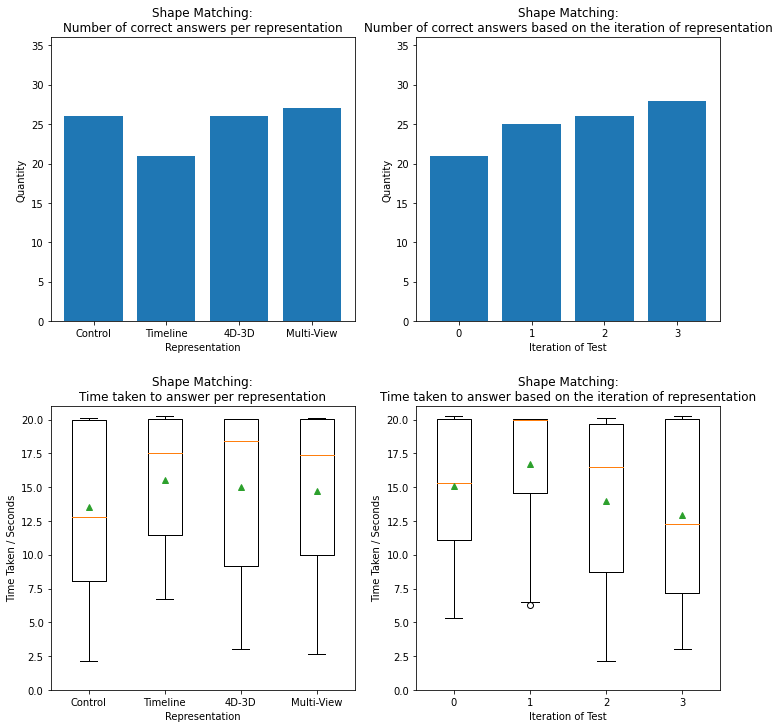

In [10]:
# Show Graphs
fig = plt.figure(figsize = (12, 12))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Shape Matching:\nNumber of correct answers per representation")
d = SHAPE_correct_count(compiled_data)
x = d.keys()
y = d.values()
ax0.bar(x, y)
ax0.set_ylim((0, 5*RESULT_MULTIPLIER+1))
ax0.set_ylabel("Quantity")
ax0.set_xlabel("Representation")

ax1.set_title("Shape Matching:\nNumber of correct answers based on the iteration of representation")
d = SHAPE_correct_count(ordered_data)
x = d.keys()
y = d.values()
ax1.bar(x, y)
ax1.set_ylim((0, 5*RESULT_MULTIPLIER+1))
ax1.set_ylabel("Quantity")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Shape Matching:\nTime taken to answer per representation")
x = SHAPE_time_data(compiled_data).keys()
d = [i for i in SHAPE_time_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 21))
ax2.set_ylabel("Time Taken / Seconds")
ax2.set_xlabel("Representation")

ax3.set_title("Shape Matching:\nTime taken to answer based on the iteration of representation")
x = SHAPE_time_data(ordered_data).keys()
d = [i for i in SHAPE_time_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 21))
ax3.set_ylabel("Time Taken / Seconds")
ax3.set_xlabel("Iteration of Test")

plt.savefig("figures/shape_matching_stats.png")

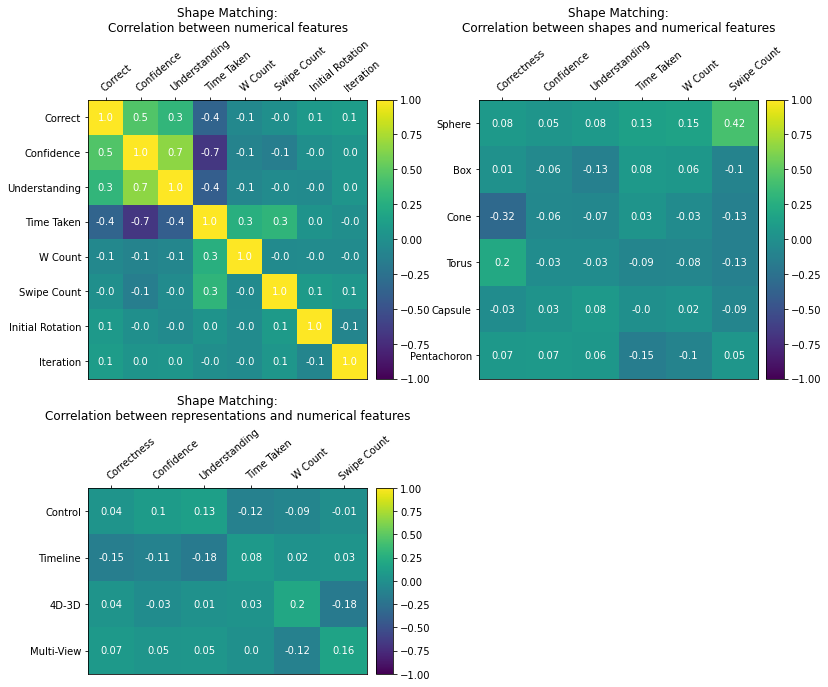

In [11]:
fig = plt.figure(figsize = (12, 12))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
fig.subplots_adjust(hspace=0.1, wspace=0.4)

def correlation_matrix(ax, labels, matrix, title, dp = 1, dimensions = ((0, 8), (0, 8))):
    ax.set_title(title)

    h = dimensions[0][1] - dimensions[0][0]
    w = dimensions[1][1] - dimensions[1][0]

    # Build Correlation Matrix
    matrix = matrix[ dimensions[0][0]:dimensions[0][1],
                     dimensions[1][0]:dimensions[1][1] ]

    # Plot the correlation coefficient heatmat
    im = ax.imshow(matrix, vmin = -1, vmax = 1)
    ax.set_yticks(np.arange( h ), labels=labels[dimensions[0][0]:dimensions[0][1]])
    ax.set_xticks(np.arange( w ), labels=labels[dimensions[1][0]:dimensions[1][1]])
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.01,
                        ax.get_position().y0,
                        0.02,
                        ax.get_position().height])
    
    # Plot vertical colorbar
    plt.colorbar(im, cax=cax)
    
    # Overlay the correlation coefficient
    for i in range( h ):
        for j in range( w ):
            ax.text(j, i, round(matrix[i, j], dp), ha="center", va="center", color="w")


labels, matrix = SHAPE_numerical_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax0, labels, matrix, "Shape Matching:\nCorrelation between numerical features", 1, ((0, 8), (0, 8)) )

labels, matrix = SHAPE_shape_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax1, labels, matrix, "Shape Matching:\nCorrelation between shapes and numerical features", 2, ((0, 6), (6, 12)) )

labels, matrix = SHAPE_representation_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax2, labels, matrix, "Shape Matching:\nCorrelation between representations and numerical features", 2, ((0, 4), (4, 10)) )

plt.savefig("figures/shape_matching_correlations.png")

### Rotation Matching
The correctness and complexity of rotations

In [12]:
def ROTATE_jaccard_data(data):
    indices = {}

    # iterate through each key
    for key, value in data.items():
        indices[key] = []
        
        # iterate through all the tests and find the similarity between
        # boolean arrays of loaded and selected rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            indices[key].append(
                jaccard_index(
                value["Rotation Match"]["Loaded Rotation"][i],
                value["Rotation Match"]["Selected Rotation"][i]
                )
            )

    return indices

def ROTATE_mean_jaccard(data):
    i = ROTATE_jaccard_data(data)
    for key, value in i.items():
        i[key] = np.mean(value)
    return i
    

def ROTATE_totally_correct_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0
        
        # iterate through all the tests and find the similarity between
        # boolean arrays of loaded and selected rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            if value["Rotation Match"]["Loaded Rotation"][i] == \
               value["Rotation Match"]["Selected Rotation"][i]:
                count[key] += 1

    return count

def ROTATE_no_of_rotations_data(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = []
        
        # iterate through all the tests and append the sum of the number of rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            count[key].append( np.sum(value["Rotation Match"]["Loaded Rotation"][i]) )

    return count

The average time taken for every rotation match test

In [13]:
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def ROTATE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Rotation Match"]["Time Taken"])):
            times[key].append(value["Rotation Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def ROTATE_mean_time_data(data):
    average_time = {}
    d = ROTATE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

    

Output the above data

In [14]:
# Output Data
def ROTATE_output(data):
    #print("The similarity between loaded and selected rotations: ", ROTATE_jaccard_data(data))
    print("The mean similarity of rotations:                     ", ROTATE_mean_jaccard(data))
    print("The number of totally correct answers:                ", ROTATE_totally_correct_count(data))
    #print("The number of rotations per test: ", ROTATE_no_of_rotations_data(data))
    #print(ROTATE_time_data(data))
    print("The mean time to answer:                              ", ROTATE_mean_time_data(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    ROTATE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    ROTATE_output(data)


Data per Representation:
The mean similarity of rotations:                      {'Control': 0.3428571428571428, 'Timeline': 0.4380952380952381, '4D-3D': 0.4857142857142857, 'Multi-View': 0.40428571428571425}
The number of totally correct answers:                 {'Control': 4, 'Timeline': 12, '4D-3D': 13, 'Multi-View': 5}
The mean time to answer:                               {'Control': 34.58203648158482, 'Timeline': 44.12059064592634, '4D-3D': 36.4258780343192, 'Multi-View': 41.997098214285714}

Data based on Order:
The mean similarity of rotations:                      {'0': 0.3857142857142857, '1': 0.4476190476190476, '2': 0.37857142857142856, '3': 0.45904761904761904}
The number of totally correct answers:                 {'0': 7, '1': 9, '2': 7, '3': 11}
The mean time to answer:                               {'0': 45.547987583705364, '1': 40.96264299665179, '2': 36.85981794084822, '3': 33.755154854910714}


Graphing Functions

In [15]:
# Graphing

def ROTATE_numerical_corr_coef_mat(data):
    labels = ["Correctness", "Confidence", "Understanding", "Time Taken", "Number of Rotations", "Iteration"]

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}
    iteration = 0
    rotations = ROTATE_no_of_rotations_data(data)

    for key, value in data.items():
        for i in range(len(value["Rotation Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( jaccard_index(value["Rotation Match"]["Selected Rotation"][i], value["Rotation Match"]["Loaded Rotation"][i]) )
            test_data.append( int(value["Rotation Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Rotation Match"]["Understanding"][i]] )
            test_data.append( value["Rotation Match"]["Time Taken"][i] )
            test_data.append( rotations[key][i] )
            test_data.append( iteration )
            iteration += 1

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def ROTATE_shape_corr_coef_mat(data):
    labels = ["Box", "Cone", "Torus", "Capsule", "Pentachoron",               # Shapes
              "Correctness", "Confidence", "Understanding", "Time Taken"] # Continuous Metrics

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}

    for key, value in data.items():
        for i in range(len(value["Rotation Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( SHAPE_eq("Box", value["Rotation Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Cone", value["Rotation Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Torus", value["Rotation Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Capsule", value["Rotation Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Tetrahedron", value["Rotation Match"]["Loaded Shape"][i]) )
            
            test_data.append( jaccard_index(value["Rotation Match"]["Selected Rotation"][i], value["Rotation Match"]["Loaded Rotation"][i]) )
            test_data.append( int(value["Rotation Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Rotation Match"]["Understanding"][i]] )
            test_data.append( value["Rotation Match"]["Time Taken"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def ROTATE_representation_corr_coef_mat(data):
    labels = ["Control", "Timeline", "4D-3D", "Multi-View",                   # Representations
              "Correctness", "Confidence", "Understanding", "Time Taken"] # Continuous Metrics

    vectors = []
    understanding = {"Yes":1, "No":0, "Sort of":0.5}

    for key, value in data.items():
        for i in range(len(value["Rotation Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( key == "Control" )
            test_data.append( key == "Timeline" )
            test_data.append( key == "4D-3D" )
            test_data.append( key == "Multi-View" )
            
            test_data.append( jaccard_index(value["Rotation Match"]["Selected Rotation"][i], value["Rotation Match"]["Loaded Rotation"][i]) )
            test_data.append( int(value["Rotation Match"]["Confidence"][i]) )
            test_data.append( understanding[value["Rotation Match"]["Understanding"][i]] )
            test_data.append( value["Rotation Match"]["Time Taken"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

Display Data

In [16]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

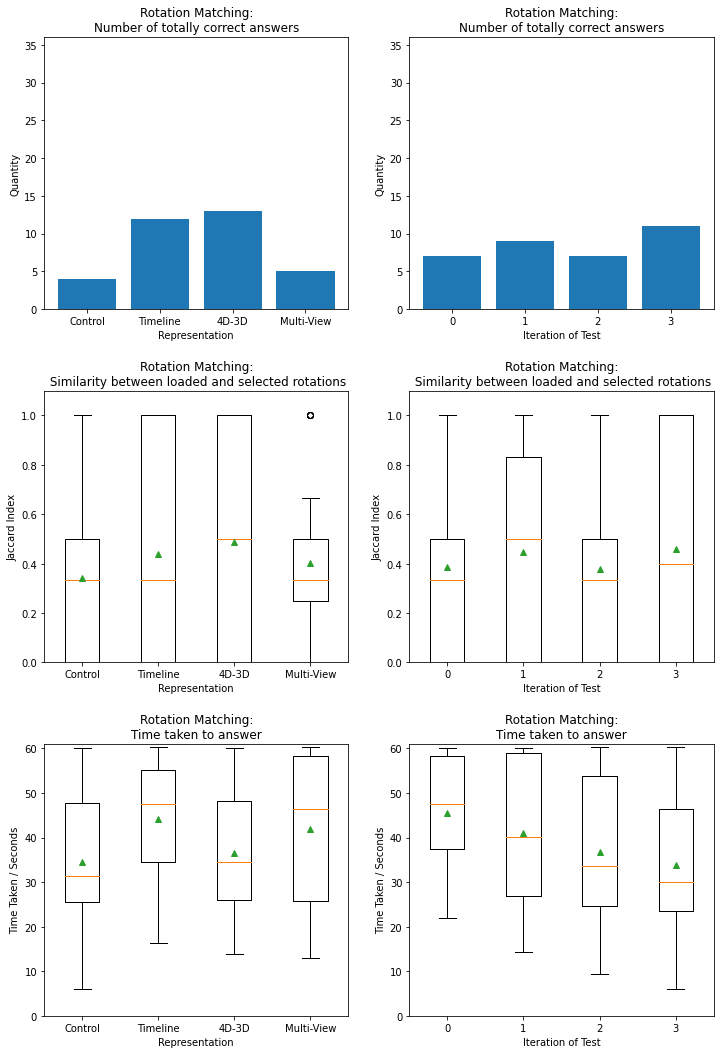

In [17]:
# Show Graphs
fig = plt.figure(figsize = (12, 18))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Rotation Matching:\nNumber of totally correct answers")
d = ROTATE_totally_correct_count(compiled_data)
x = d.keys()
y = d.values()
ax0.bar(x, y)
ax0.set_ylim((0, 5*RESULT_MULTIPLIER+1))
ax0.set_ylabel("Quantity")
ax0.set_xlabel("Representation")

ax1.set_title("Rotation Matching:\nNumber of totally correct answers")
d = ROTATE_totally_correct_count(ordered_data)
x = d.keys()
y = d.values()
ax1.bar(x, y)
ax1.set_ylim((0, 5*RESULT_MULTIPLIER+1))
ax1.set_ylabel("Quantity")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Rotation Matching:\n Similarity between loaded and selected rotations")
x = ROTATE_jaccard_data(compiled_data).keys()
d = [i for i in ROTATE_jaccard_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 1.1))
ax2.set_ylabel("Jaccard Index")
ax2.set_xlabel("Representation")

ax3.set_title("Rotation Matching:\n Similarity between loaded and selected rotations")
x = ROTATE_jaccard_data(ordered_data).keys()
d = [i for i in ROTATE_jaccard_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 1.1))
ax3.set_ylabel("Jaccard Index")
ax3.set_xlabel("Iteration of Test")

ax4.set_title("Rotation Matching:\nTime taken to answer")
x = ROTATE_time_data(compiled_data).keys()
d = [i for i in ROTATE_time_data(compiled_data).values()]
ax4.boxplot( d, showmeans=True )
ax4.set_xticks(order, x)
ax4.set_ylim((0, 61))
ax4.set_ylabel("Time Taken / Seconds")
ax4.set_xlabel("Representation")

ax5.set_title("Rotation Matching:\nTime taken to answer")
x = ROTATE_time_data(ordered_data).keys()
d = [i for i in ROTATE_time_data(ordered_data).values()]
ax5.boxplot( d, showmeans=True )
ax5.set_xticks(order, x)
ax5.set_ylim((0, 61))
ax5.set_ylabel("Time Taken / Seconds")
ax5.set_xlabel("Iteration of Test")

plt.savefig("figures/rotation_matching_stats.png")

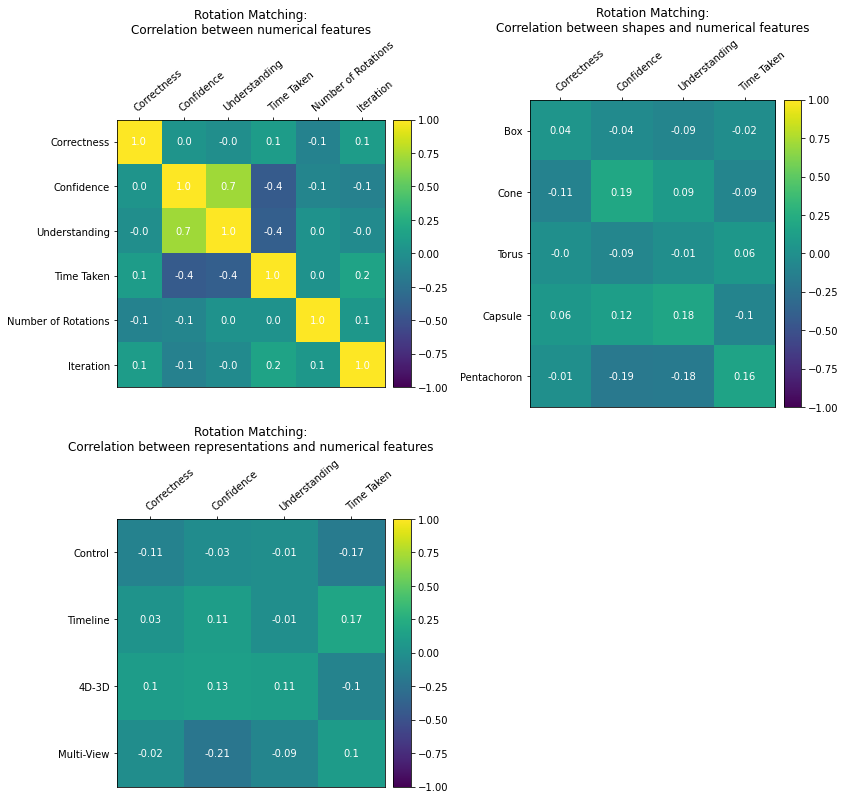

In [18]:
fig = plt.figure(figsize = (12, 13))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
fig.subplots_adjust(hspace=0.3, wspace=0.5)

def correlation_matrix(ax, labels, matrix, title, dp = 1, dimensions = ((0, 8), (0, 8))):
    ax.set_title(title)

    h = dimensions[0][1] - dimensions[0][0]
    w = dimensions[1][1] - dimensions[1][0]

    # Build Correlation Matrix
    matrix = matrix[ dimensions[0][0]:dimensions[0][1],
                     dimensions[1][0]:dimensions[1][1] ]

    # Plot the correlation coefficient heatmat
    im = ax.imshow(matrix, vmin = -1, vmax = 1)
    ax.set_yticks(np.arange( h ), labels=labels[dimensions[0][0]:dimensions[0][1]])
    ax.set_xticks(np.arange( w ), labels=labels[dimensions[1][0]:dimensions[1][1]])
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.01,
                        ax.get_position().y0,
                        0.02,
                        ax.get_position().height])
    
    # Plot vertical colorbar
    plt.colorbar(im, cax=cax)
    
    # Overlay the correlation coefficient
    for i in range( h ):
        for j in range( w ):
            ax.text(j, i, round(matrix[i, j], dp), ha="center", va="center", color="w")


labels, matrix = ROTATE_numerical_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax0, labels, matrix, "Rotation Matching:\nCorrelation between numerical features", 1, ((0, 6), (0, 6)) )

labels, matrix = ROTATE_shape_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax1, labels, matrix, "Rotation Matching:\nCorrelation between shapes and numerical features", 2, ((0, 5), (5, 9)) )

labels, matrix = ROTATE_representation_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax2, labels, matrix, "Rotation Matching:\nCorrelation between representations and numerical features", 2, ((0, 4), (4, 8)) )

plt.savefig("figures/rotation_matching_correlations.png")

### Pose Matching
The mean, best and worst minimum angles of rotation between objects

In [19]:
def POSE_accuracy_data(data):
    d = {}

    for key, value in data.items():
        d[key] = []
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            d[key].append( rad_deg( Rotor.Rotor4.difference(a, b) ))
    return d

def POSE_mean_accuracy(data):
    d = POSE_accuracy_data(data)
    for key, value in d.items():
        d[key] = np.mean(value)
    return d

def POSE_best_accuracy(data):
    d = {}

    for key, value in data.items():
        d[key] = 360
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            dif = rad_deg( Rotor.Rotor4.difference(a, b) )
            if dif < d[key]:
                d[key] = dif
    return d

def POSE_worst_accuracy(data):
    d = {}

    for key, value in data.items():
        d[key] = 0
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            dif = rad_deg( Rotor.Rotor4.difference(a, b) )
            if dif > d[key]:
                d[key] = dif
    return d

The average time taken for every pose match test

In [20]:
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def POSE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Pose Match"]["Time Taken"])):
            times[key].append(value["Pose Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def POSE_mean_time(data):
    average_time = {}
    d = POSE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

Output the above data

In [21]:
# Output Data
def POSE_output(data):
    #print(": ", POSE_accuracy_data(data))
    print("The mean minimum angle between objects:  ", POSE_mean_accuracy(data))
    print("The best minimum angle between objects:  ", POSE_best_accuracy(data))
    print("The worst minimum angle between objects: ", POSE_worst_accuracy(data))
    #print(": ", POSE_time_data(data))
    print("The mean time to submit: ", POSE_mean_time(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    POSE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    POSE_output(data)

Data per Representation:
The mean minimum angle between objects:   {'Control': 73.09153643509678, 'Timeline': 80.62298101999792, '4D-3D': 71.90448020585684, 'Multi-View': 82.3831347769369}
The best minimum angle between objects:   {'Control': 9.55616912097547, 'Timeline': 15.259932414826705, '4D-3D': 12.775359512128675, 'Multi-View': 38.68218490978389}
The worst minimum angle between objects:  {'Control': 106.350040273702, 'Timeline': 106.71796338971353, '4D-3D': 128.2148957477104, 'Multi-View': 102.25289496756811}
The mean time to submit:  {'Control': 125.35849725632445, 'Timeline': 149.82349504743323, '4D-3D': 126.01446533203129, 'Multi-View': 141.15091378348217}

Data based on Order:
The mean minimum angle between objects:   {'0': 84.44589679016687, '1': 78.80063229372588, '2': 76.22907819410295, '3': 70.29061899881746}
The best minimum angle between objects:   {'0': 38.2554705713012, '1': 13.736104868470685, '2': 9.645490922225322, '3': 11.83251456895967}
The worst minimum angle be

Graphing Functions

In [22]:
# Graphing

def POSE_numerical_corr_coef_mat(data):
    labels = ["Accuracy", "Ease", "Time Taken", "W Count", "Swipe Count", "Initial Rotation", "Iteration"]

    vectors = []
    iteration = 0
    rotations = ROTATE_no_of_rotations_data(data)

    for key, value in data.items():
        for i in range(len(value["Pose Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( rad_deg( Rotor.Rotor4.difference(
                rotor_from_list(value["Pose Match"]["Main Rotor"][i]),
                rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            )) )
            test_data.append( int(value["Pose Match"]["Ease"][i]) )
            test_data.append( value["Pose Match"]["Time Taken"][i] )
            test_data.append( value["Pose Match"]["W Count"][i] )
            test_data.append( value["Pose Match"]["Swipe Count"][i] )
            test_data.append( Rotor.Rotor4.difference(
                rotor_from_list(value["Pose Match"]["Initial Match Rotor"][i]),
                rotor_from_list([1,0,0,0,0,0,0,0])
            ) ) # distance from a 90 degree rotation?
            test_data.append( iteration )
            iteration += 1

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def POSE_shape_corr_coef_mat(data):
    labels = ["Box", "Cone", "Torus", "Capsule", "Pentachoron",           # Shapes
              "Accuracy", "Ease", "Time Taken", "W Count", "Swipe Count"] # Continuous Metrics

    vectors = []

    for key, value in data.items():
        for i in range(len(value["Pose Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( SHAPE_eq("Box", value["Pose Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Cone", value["Pose Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Torus", value["Pose Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Capsule", value["Pose Match"]["Loaded Shape"][i]) )
            test_data.append( SHAPE_eq("Tetrahedron", value["Pose Match"]["Loaded Shape"][i]) )
            
            test_data.append( rad_deg( Rotor.Rotor4.difference(
                rotor_from_list(value["Pose Match"]["Main Rotor"][i]),
                rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            )) )
            test_data.append( int(value["Pose Match"]["Ease"][i]) )
            test_data.append( value["Pose Match"]["Time Taken"][i] )
            test_data.append( value["Pose Match"]["W Count"][i] )
            test_data.append( value["Pose Match"]["Swipe Count"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

def POSE_representation_corr_coef_mat(data):
    labels = ["Control", "Timeline", "4D-3D", "Multi-View",               # Representations
              "Accuracy", "Ease", "Time Taken", "W Count", "Swipe Count"] # Continuous Metrics

    vectors = []

    for key, value in data.items():
        for i in range(len(value["Pose Match"]["Loaded Shape"])):
            test_data = []
            test_data.append( key == "Control" )
            test_data.append( key == "Timeline" )
            test_data.append( key == "4D-3D" )
            test_data.append( key == "Multi-View" )
            
            test_data.append( rad_deg( Rotor.Rotor4.difference(
                rotor_from_list(value["Pose Match"]["Main Rotor"][i]),
                rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            )) )
            test_data.append( int(value["Pose Match"]["Ease"][i]) )
            test_data.append( value["Pose Match"]["Time Taken"][i] )
            test_data.append( value["Pose Match"]["W Count"][i] )
            test_data.append( value["Pose Match"]["Swipe Count"][i] )

            vectors.append(test_data)
    return (labels, np.array(vectors).T)

Display Data

In [23]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

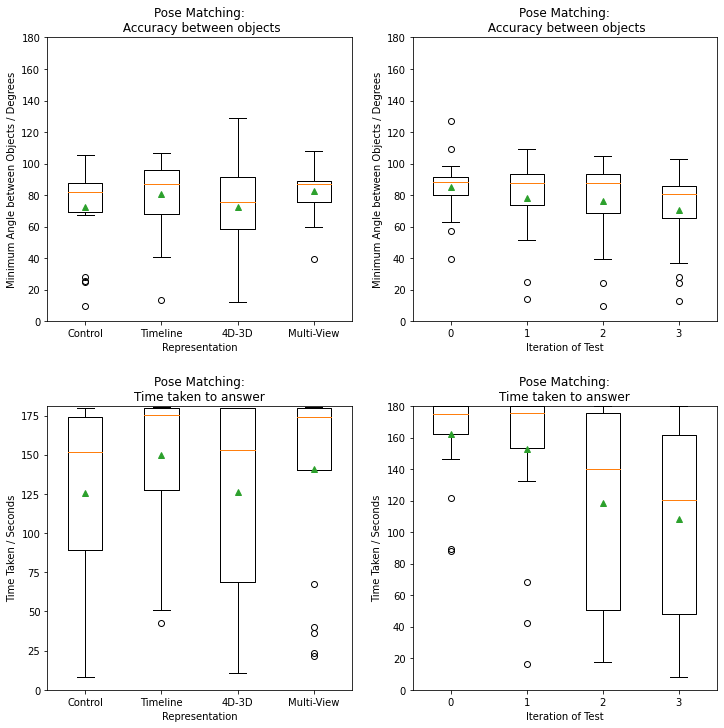

In [24]:
# Show Graphs
fig = plt.figure(figsize = (12, 12))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Pose Matching:\n Accuracy between objects")
x = POSE_accuracy_data(compiled_data).keys()
d = [i for i in POSE_accuracy_data(compiled_data).values()]
ax0.boxplot( d, showmeans=True )
ax0.set_xticks(order, x)
ax0.set_ylim((0, 180))
ax0.set_ylabel("Minimum Angle between Objects / Degrees")
ax0.set_xlabel("Representation")

ax1.set_title("Pose Matching:\n Accuracy between objects")
x = POSE_accuracy_data(ordered_data).keys()
d = [i for i in POSE_accuracy_data(ordered_data).values()]
ax1.boxplot( d, showmeans=True )
ax1.set_xticks(order, x)
ax1.set_ylim((0, 180))
ax1.set_ylabel("Minimum Angle between Objects / Degrees")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Pose Matching:\nTime taken to answer")
x = POSE_time_data(compiled_data).keys()
d = [i for i in POSE_time_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 181))
ax2.set_ylabel("Time Taken / Seconds")
ax2.set_xlabel("Representation")

ax3.set_title("Pose Matching:\nTime taken to answer")
x = POSE_time_data(ordered_data).keys()
d = [i for i in POSE_time_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 180))
ax3.set_ylabel("Time Taken / Seconds")
ax3.set_xlabel("Iteration of Test")

plt.savefig("figures/pose_matching_stats.png")

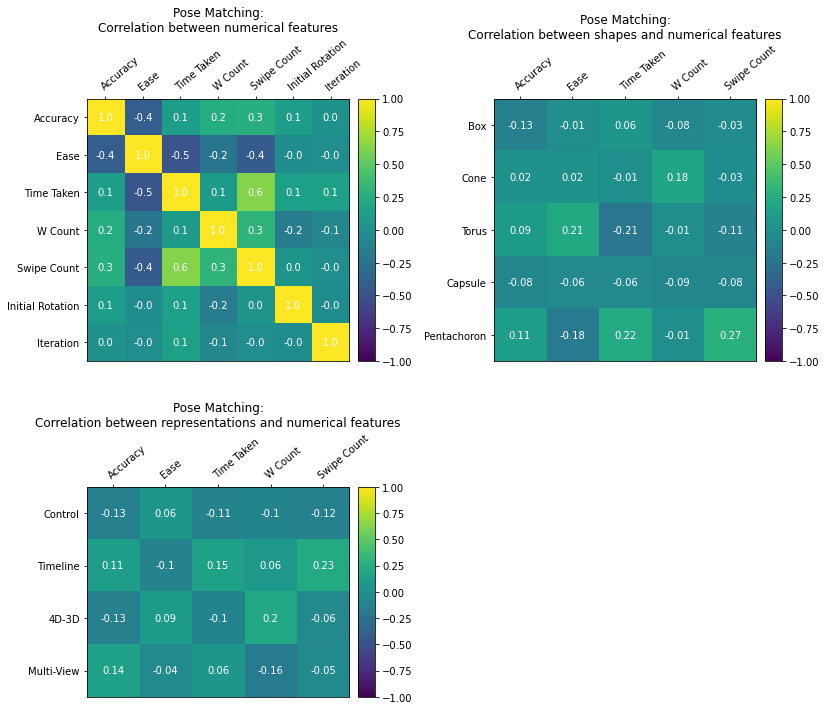

In [25]:
fig = plt.figure(figsize = (12, 13))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
fig.subplots_adjust(hspace=0.05, wspace=0.55)

def correlation_matrix(ax, labels, matrix, title, dp = 1, dimensions = ((0, 8), (0, 8))):
    ax.set_title(title)

    h = dimensions[0][1] - dimensions[0][0]
    w = dimensions[1][1] - dimensions[1][0]

    # Build Correlation Matrix
    matrix = matrix[ dimensions[0][0]:dimensions[0][1],
                     dimensions[1][0]:dimensions[1][1] ]

    # Plot the correlation coefficient heatmat
    im = ax.imshow(matrix, vmin = -1, vmax = 1)
    ax.set_yticks(np.arange( h ), labels=labels[dimensions[0][0]:dimensions[0][1]])
    ax.set_xticks(np.arange( w ), labels=labels[dimensions[1][0]:dimensions[1][1]])
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.01,
                        ax.get_position().y0,
                        0.02,
                        ax.get_position().height])
    
    # Plot vertical colorbar
    plt.colorbar(im, cax=cax)
    
    # Overlay the correlation coefficient
    for i in range( h ):
        for j in range( w ):
            ax.text(j, i, round(matrix[i, j], dp), ha="center", va="center", color="w")


labels, matrix = POSE_numerical_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax0, labels, matrix, "Pose Matching:\nCorrelation between numerical features", 1, ((0, 7), (0, 7)) )

labels, matrix = POSE_shape_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax1, labels, matrix, "Pose Matching:\nCorrelation between shapes and numerical features", 2, ((0, 5), (5, 10)) )

labels, matrix = POSE_representation_corr_coef_mat(compiled_data)
matrix = np.corrcoef(matrix)
correlation_matrix(ax2, labels, matrix, "Pose Matching:\nCorrelation between representations and numerical features", 2, ((0, 4), (4, 9)) )

plt.savefig("figures/pose_matching_correlations.png")